In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# **Config**

In [2]:
sns.set_theme(style="darkgrid")
title_data = 'Time Bulk'
paleta = sns.color_palette("tab10").as_hex()

# **Functions**

In [3]:
def porcentaje_nulos_x_caracteristica(data:pd.DataFrame, **kwargs)->None:
  """Calcular el porcentaje de valores nulos por caracteristicas"""
  data.isnull().melt().pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            ).set(**kwargs)
        )
    )

# **Data**
---

In [4]:
url_data_bulk_time = 'https://drive.google.com/file/d/1UjtllprJ7ZcTencdpyGpI8sIcPnuBbCR/view?usp=sharing'
url_data_bulk_time = 'https://drive.google.com/uc?id=' + url_data_bulk_time.split('/')[-2]
data_bulk_time= pd.read_csv(url_data_bulk_time)

In [5]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [6]:
data_bulk_time.shape

(3129, 16)

- -There are 3129 batches of bulk-

In [7]:
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


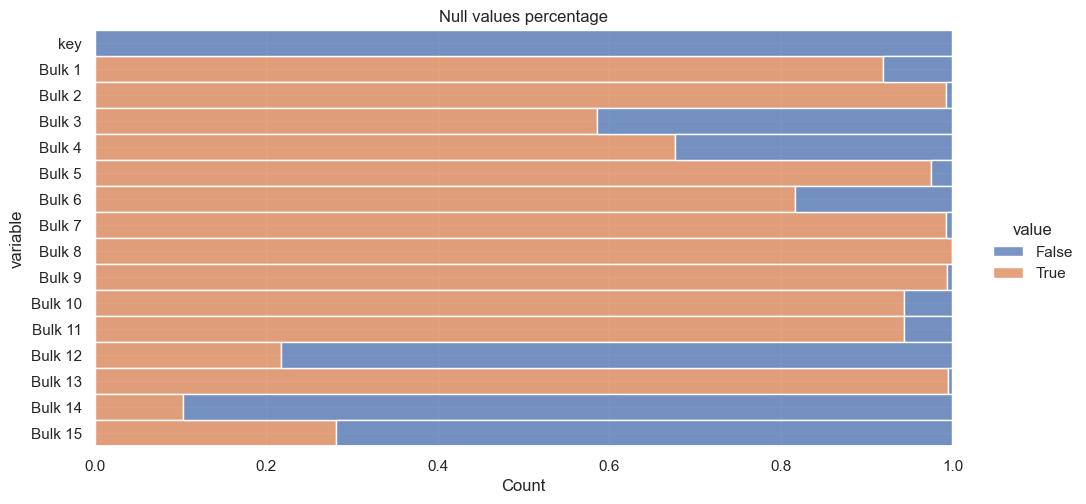

In [8]:
porcentaje_nulos_x_caracteristica(data_bulk_time, title='Null values percentage')

- Hay un porcentaje grande de valores nulos en la mayoría de columnas, menos a los lotes. 
- -There are many null values in all functions, except in the key column 'batches'-

- Falta la mayoría de los datos en las columnas Bulk 1, Bulk 2, Bulk 5, Bulk 7, Bulk 8, Bulk 9, Bulk 10, Bulk 11, Bulk 13, con un porcentaje superior al 90%.
- -Most of data in columns Bulk 1, Bulk 2, Bulk 5, Bulk 7, Bulk 8, Bulk 9, Bulk 10, Bulk 11, Bulk 13 is missing, with a percentage above 90%.-

- Faltan datos en las columnas Bulk 3, Bulk 4, Bulk 6 con un porcentaje entre 50% - 80%
- -There are missing data in columns Bulk 3, Bulk 4, Bulk 6 with a percentage between 50% - 80%-

- Faltan datos en las columnas Bulk 12 y Bulk 15 con un porcentaje entre 21% y 28%.
- -There are missing data in columns Bulk 12 and Bulk 15 with a percentage between 21% - 28%-

- Bulk 14 tiene la menor cantidad de datos faltantes con un porcentaje del 10%.
- -Bulk 14 has the lowest amount of missing data with a percentage of 10%.-


In [9]:
data_bulk_time.columns

Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')

In [10]:
data_bulk_time['Bulk 1'] = pd.to_datetime(data_bulk_time['Bulk 1'])
data_bulk_time['Bulk 2'] = pd.to_datetime(data_bulk_time['Bulk 2'])
data_bulk_time['Bulk 3'] = pd.to_datetime(data_bulk_time['Bulk 3'])
data_bulk_time['Bulk 4'] = pd.to_datetime(data_bulk_time['Bulk 4'])
data_bulk_time['Bulk 5'] = pd.to_datetime(data_bulk_time['Bulk 5'])
data_bulk_time['Bulk 6'] = pd.to_datetime(data_bulk_time['Bulk 6'])
data_bulk_time['Bulk 7'] = pd.to_datetime(data_bulk_time['Bulk 7'])
data_bulk_time['Bulk 8'] = pd.to_datetime(data_bulk_time['Bulk 8'])
data_bulk_time['Bulk 9'] = pd.to_datetime(data_bulk_time['Bulk 9'])
data_bulk_time['Bulk 10'] = pd.to_datetime(data_bulk_time['Bulk 10'])
data_bulk_time['Bulk 11'] = pd.to_datetime(data_bulk_time['Bulk 11'])
data_bulk_time['Bulk 12'] = pd.to_datetime(data_bulk_time['Bulk 12'])
data_bulk_time['Bulk 13'] = pd.to_datetime(data_bulk_time['Bulk 13'])
data_bulk_time['Bulk 14'] = pd.to_datetime(data_bulk_time['Bulk 14'])
data_bulk_time['Bulk 15'] = pd.to_datetime(data_bulk_time['Bulk 15'])

In [11]:
data_bulk_time.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252,22,1298,1014,77,576,25,1,19,176,177,2450,18,2806,2248
mean,1624.383509,2019-06-27 08:32:26.031746048,2019-07-09 02:04:44.545454336,2019-07-05 14:02:19.653312768,2019-06-30 17:27:38.687376896,2019-07-10 12:23:28.623376640,2019-07-03 15:57:30.003472384,2019-07-23 21:38:41.040000,2019-07-05 17:46:11,2019-06-21 00:53:43.157894912,2019-07-04 02:03:09.647727616,2019-07-11 23:35:46.310734336,2019-07-03 02:04:28.317142784,2019-06-29 02:00:06.722222336,2019-07-03 10:03:08.939059200,2019-07-03 16:07:21.480871936
min,1.000000,2019-05-03 17:50:19,2019-05-07 08:36:19,2019-05-03 20:13:36,2019-05-03 11:21:30,2019-05-07 08:36:19,2019-05-03 18:52:57,2019-05-07 11:37:42,2019-07-05 17:46:11,2019-05-14 00:04:56,2019-05-06 01:36:24,2019-05-05 16:45:05,2019-05-03 11:03:52,2019-05-05 00:39:35,2019-05-03 11:03:52,2019-05-03 11:03:52
25%,816.000000,2019-05-28 02:36:05.750000128,2019-05-26 21:24:43.249999872,2019-06-06 08:39:05.500000,2019-05-29 08:23:05.750000128,2019-06-17 19:42:11,2019-06-05 04:40:07,2019-07-17 11:25:12,2019-07-05 17:46:11,2019-05-14 02:37:23.500000,2019-05-31 15:29:27.500000,2019-06-12 19:24:37,2019-06-01 23:11:18,2019-05-27 22:41:40.750000128,2019-06-02 12:09:03.249999872,2019-06-02 18:47:20.249999872
50%,1622.000000,2019-06-23 02:31:45.500000,2019-07-23 15:06:49.500000,2019-07-01 17:13:22,2019-06-25 18:44:37.500000,2019-07-21 23:25:54,2019-07-06 03:56:28.500000,2019-07-23 15:37:44,2019-07-05 17:46:11,2019-05-14 05:15:06,2019-07-03 08:39:55.500000,2019-07-20 18:08:09,2019-06-30 09:36:04,2019-06-28 22:21:35,2019-07-01 05:46:54.500000,2019-07-01 00:46:14.500000
75%,2431.000000,2019-07-27 00:38:33.249999872,2019-08-08 10:55:53.750000128,2019-08-06 14:11:27.750000128,2019-07-30 21:37:44,2019-08-08 11:51:23,2019-08-03 09:02:40.750000128,2019-08-08 12:03:38,2019-07-05 17:46:11,2019-08-11 11:43:13,2019-07-30 19:28:59,2019-08-06 18:01:34,2019-08-04 04:41:33.249999872,2019-07-31 15:31:55.249999872,2019-08-04 17:37:32,2019-08-04 22:40:55
max,3241.000000,2019-08-30 23:01:32,2019-08-08 17:34:38,2019-08-31 23:39:11,2019-08-30 17:36:30,2019-08-28 09:01:08,2019-09-01 03:12:40,2019-08-31 07:22:25,2019-07-05 17:46:11,2019-08-11 15:09:33,2019-08-30 01:30:42,2019-08-31 16:00:49,2019-09-01 01:39:41,2019-08-26 20:31:16,2019-09-01 04:05:34,2019-09-01 04:05:34
std,933.337642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_bulk_time_copy = data_bulk_time.copy()

In [13]:
data_bulk_time_copy["bulk_date_1"] = data_bulk_time['Bulk 1'].dt.month
data_bulk_time_copy["bulk_date_2"] = data_bulk_time['Bulk 2'].dt.month
data_bulk_time_copy["bulk_date_3"] = data_bulk_time['Bulk 3'].dt.month
data_bulk_time_copy["bulk_date_4"] = data_bulk_time['Bulk 4'].dt.month
data_bulk_time_copy["bulk_date_5"] = data_bulk_time['Bulk 5'].dt.month
data_bulk_time_copy["bulk_date_6"] = data_bulk_time['Bulk 6'].dt.month
data_bulk_time_copy["bulk_date_7"] = data_bulk_time['Bulk 7'].dt.month
data_bulk_time_copy["bulk_date_8"] = data_bulk_time['Bulk 8'].dt.month
data_bulk_time_copy["bulk_date_9"] = data_bulk_time['Bulk 9'].dt.month
data_bulk_time_copy["bulk_date_10"] = data_bulk_time['Bulk 10'].dt.month
data_bulk_time_copy["bulk_date_11"] = data_bulk_time['Bulk 11'].dt.month
data_bulk_time_copy["bulk_date_12"] = data_bulk_time['Bulk 12'].dt.month
data_bulk_time_copy["bulk_date_13"] = data_bulk_time['Bulk 13'].dt.month
data_bulk_time_copy["bulk_date_14"] = data_bulk_time['Bulk 14'].dt.month
data_bulk_time_copy["bulk_date_15"] = data_bulk_time['Bulk 15'].dt.month

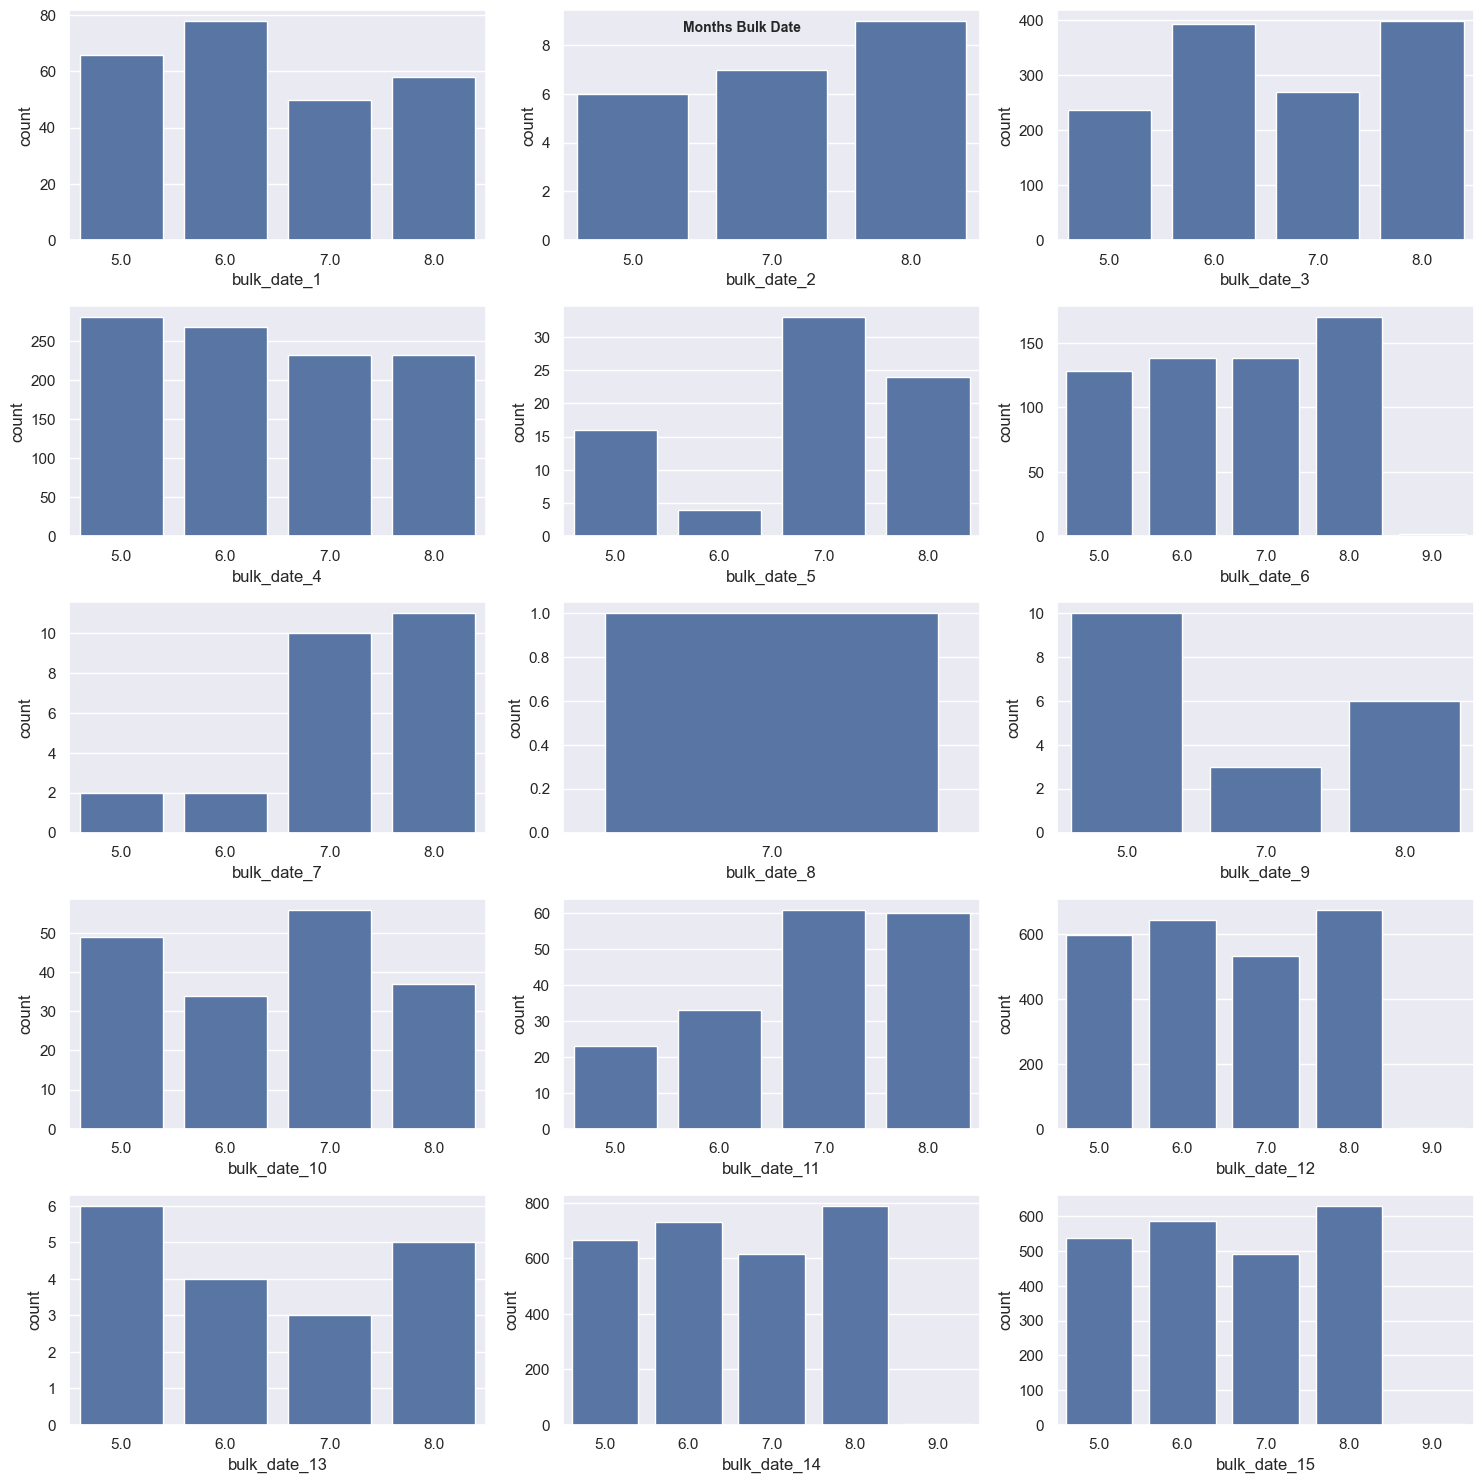

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
sns.countplot(data=data_bulk_time_copy, x='bulk_date_1', ax=ax[0,0])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_2', ax=ax[0,1])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_3', ax=ax[0,2])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_4', ax=ax[1,0])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_5', ax=ax[1,1])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_6', ax=ax[1,2])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_7', ax=ax[2,0])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_8', ax=ax[2,1])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_9', ax=ax[2,2])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_10', ax=ax[3,0])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_11', ax=ax[3,1])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_12', ax=ax[3,2])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_13', ax=ax[4,0])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_14', ax=ax[4,1])
sns.countplot(data=data_bulk_time_copy, x='bulk_date_15', ax=ax[4,2])
fig.tight_layout()
fig.suptitle('Months Bulk Date', fontsize = 10, fontweight = "bold");

plt.show()

- La mayor parte del producto a granel se procesó durante aproximadamente tres o cuatro meses.
- -Most  bulk were processed for approximately three to four months.-

- El bulto 8 es el que se procesa en un mes
- -The Bulk 8 that process in one month-
